# Finger Excersice 1

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import csv

def summarizeList(list0,list1) :
    for i in range(len(list0)) :
        list0[i] = list0[i] + list1[i]
    return list0

def promediatePixelRow(row):
    index = 0
    sumarize = 0
    for i in row :
        sumarize = sumarize + i
        index = index + 1
    return float(sumarize) / float(index)

def imageOf(list) : 
    
    pixel = np.zeros((28,28))
    
    for i in range(28*28) :
        pixel[(i/28),(i%28)] = 1 - (float(list[i]) / float(255))
        
  
    
    plt.matshow(pixel,cmap=plt.cm.gray)
    
    plt.show()

In [2]:
with open('../input/train.csv', 'r') as trainFile :
    trainReader = csv.reader(trainFile, delimiter=',', quotechar='"')
    trainFile.next()
    file = []
    otherFile = []
    for row in trainReader :
        list = []
        otherList = [row[0]]
        for i in range(28*28) :
            list.append(int(row[i + 1]))
            otherList.append(int(row[i + 1]))
            [row[0]]
        file.append(list)
        otherFile.append(otherList)
        

In [3]:
    rddTrainFile = sc.parallelize(file,64)
    rddPromediate = rddTrainFile.map(lambda row : (promediatePixelRow(row),row) )
    
    mayorPromediate = rddPromediate.takeOrdered(1,lambda x: -x[0]) #.max()
    menorPromediate = rddPromediate.takeOrdered(1,lambda x: x[0]) #.min()
    #correguir 
    
    pixelMayor = np.zeros((28,28))
    pixelMenor = np.zeros((28,28))
    
    for i in range(28*28) :
        pixelMayor[(i/28),(i%28)] = 1 - (float(mayorPromediate[0][1][i]) / float(255))
        pixelMenor[(i/28),(i%28)] = 1 - (float(menorPromediate[0][1][i]) / float(255))

### Imagen con mayor promedio de pixeles

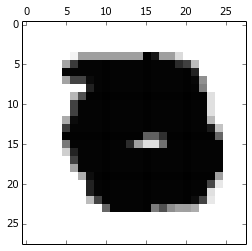

In [4]:
    plt.matshow(pixelMayor,cmap=plt.cm.gray)
    plt.show()

## Imagen con menor promedio de pixeles

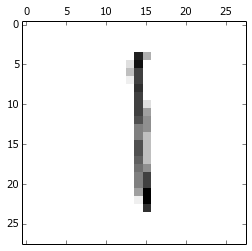

In [5]:
    plt.matshow(pixelMenor,cmap=plt.cm.gray)
    plt.show()

In [6]:
    rddTestFormat = sc.parallelize(otherFile,64)
    rddTestFormat.map(lambda row : (row[0] , 1 )).reduceByKey(lambda x,y: x+y)
    
    rddClassesCounter = rddTestFormat.map(lambda row : (row[0] , 1 )).reduceByKey(lambda x,y: x+y)
    listClassesOrdered = rddClassesCounter.takeOrdered(10)
    
    

### Tupla con las clases y la cantidad de cada una
Como se ve cada clase en el set de datos de entrenamiento se encuentra bien balanceado ya que la diferencia es despreciable.

In [7]:
    suma = 0
    for element in listClassesOrdered :
        suma = suma + element[1]
    print "Total set entrenamieto: ",suma
    
    print "Tupla (Clase,Cantidad) :",listClassesOrdered
    

Total set entrenamieto:  42000
Tupla (Clase,Cantidad) : [('0', 4132), ('1', 4684), ('2', 4177), ('3', 4351), ('4', 4072), ('5', 3795), ('6', 4137), ('7', 4401), ('8', 4063), ('9', 4188)]


In [8]:
    rddElemetsList = rddTestFormat.map(lambda row: (row.pop(0),row))
    
    rddSummarize = rddElemetsList.reduceByKey(lambda x,y : summarizeList(x,y) )
    

In [9]:
    listSummarized = rddSummarize.takeOrdered(10)

In [10]:
    listPromediate = []
    
    for i in range(len(listClassesOrdered)) :
        list = [] 
        for j in range(len(listSummarized[i][1])) :
            list.append(float(listSummarized[i][1][j]) / float(listClassesOrdered[i][1]) )
        listPromediate.append(list)
        

# A continuacion estan los promedios de las imagenes del set de datos

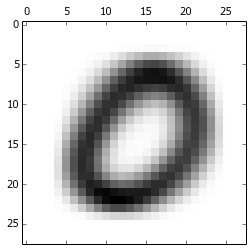

In [11]:
    imageOf(listPromediate[0])

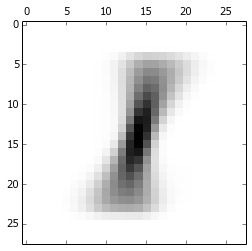

In [12]:
    imageOf(listPromediate[1])

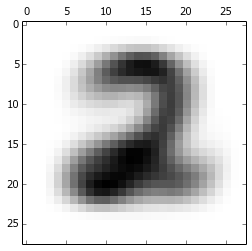

In [13]:
    imageOf(listPromediate[2])

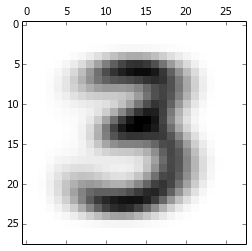

In [14]:
    imageOf(listPromediate[3])

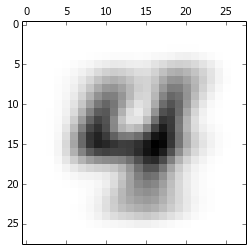

In [15]:
    imageOf(listPromediate[4])

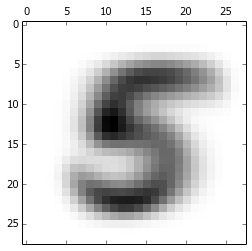

In [16]:
    imageOf(listPromediate[5])

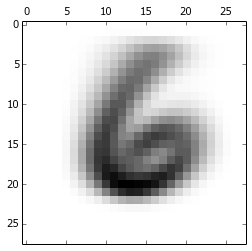

In [17]:
    imageOf(listPromediate[6])

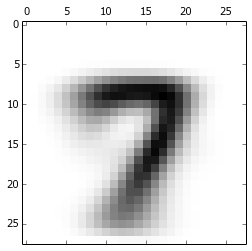

In [18]:
    imageOf(listPromediate[7])

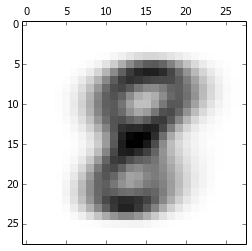

In [19]:
    imageOf(listPromediate[8])

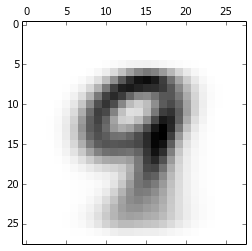

In [20]:
    imageOf(listPromediate[9])